## Stock Volatility Using Time Series

- In this notebook, we will be using pandas time series tools to compute the volatility of some Euronext stocks on a given period.
- 'Euronext_Equities_EU_2019-05-29.csv' is a file that gives some information on the stock price of some companies of Euronext on 2019-05-29.
- We will use Quandl API to get information on each company stock in the past

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import csv
import os
import requests

In [4]:
#We can have a look on the contains of the file

data = pd.read_csv('Euronext_Equities_EU_2019-05-29.csv')
print(data.head(5))
print('\n Data Types:')
print (data.dtypes)

              Name          ISIN Symbol                 Market  \
0       1000MERCIS  FR0010285965  ALMIL  Euronext Growth Paris   
1            2CRSI  FR0013341781  2CRSI         Euronext Paris   
2   4SERVICE CLOUD  CH0299791381  MLOVE  Euronext Access Paris   
3  A TOUTE VITESSE  FR0010050773  MLATV  Euronext Access Paris   
4    A.S.T. GROUPE  FR0000076887    ASP         Euronext Paris   

  Trading Currency   Open   High    Low   Last    Last Date/Time Time Zone  \
0              EUR     23   23.1     23   23.1  28/05/2019 15:12       CET   
1              EUR   9.22   9.34   9.16    9.2  28/05/2019 17:35       CET   
2              EUR  0.055  0.055  0.055  0.055  04/04/2019 11:30       CET   
3              EUR   1.69   1.69   1.69   1.69  23/05/2019 11:30       CET   
4              EUR   4.18   4.18   4.15   4.16  28/05/2019 17:17       CET   

  Volume  Turnover  
0     23     529.6  
1   2857   26409.5  
2      1      0.06  
3      2      3.38  
4   2995  12464.55  

 Data T

In [5]:
filename = 'Euronext_Equities_EU_2019-05-29.csv'

In [7]:
stock = []
with open(filename, 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        stock.append(row)
newstock = stock[1::] #to get rid of the items

Let's begin with the first symbol

In [11]:
URL = "https://www.quandl.com/api/v3/datasets/EURONEXT/"+symbols[0]+".json?api_key=F9xUFfqyGZdfFeh9stsv"
myrequest = requests.get(url = URL)

#Extracting to json format
quandlData = myrequest.json()
quandlData['dataset'].keys()

dict_keys(['id', 'dataset_code', 'database_code', 'name', 'description', 'refreshed_at', 'newest_available_date', 'oldest_available_date', 'column_names', 'frequency', 'type', 'premium', 'limit', 'transform', 'column_index', 'start_date', 'end_date', 'data', 'collapse', 'order', 'database_id'])

In [12]:
#for key in quandlData['dataset'].keys():
    #print (quandlData['dataset'][key])

In [13]:
Newlist = quandlData['dataset']['data']

#We will just consider the date and the last price

trueList = []
for i in range(len(Newlist)):
    trueList.append([Newlist[i][0],Newlist[i][3]])

#We will invert this list to have an increasing list in date
trueList.reverse()

I decided to convert the useful data into a csv file to manipulate them easily.

In [14]:
def WriteListToCSV(csv_file,csv_columns,data_list):
    try:
        with open(csv_file, 'w') as csvfile:
            writer = csv.writer(csvfile, dialect='excel', quoting=csv.QUOTE_NONNUMERIC)
            writer.writerow(csv_columns)
            for data in data_list:
                writer.writerow(data)
    except IOError:
            print("error")    
    return csv_file         

csv_columns = ['Date','Last']
csv_data_list = trueList

currentPath = os.getcwd()
csv_file = currentPath + "/Names.csv"


WriteListToCSV(csv_file,csv_columns,csv_data_list)

'/home/jehoiakim/alpaca/Names.csv'

In [15]:
oldest_date = quandlData['dataset']['oldest_available_date']
newest_date = quandlData['dataset']['newest_available_date']
            
dataQ = pd.read_csv('Names.csv')
print(dataQ.head(10))
print('\n Data Types:')
print (data.dtypes)

         Date   Last
0  2014-02-14  50.09
1  2014-02-17  50.00
2  2014-02-18  49.99
3  2014-02-20  50.15
4  2014-02-21  50.19
5  2014-02-24  50.27
6  2014-02-25  50.52
7  2014-02-26  50.52
8  2014-02-27  50.70
9  2014-02-28  50.80

 Data Types:
Name                object
ISIN                object
Symbol              object
Market              object
Trading Currency    object
Open                object
High                object
Low                 object
Last                object
Last Date/Time      object
Time Zone           object
Volume              object
Turnover            object
dtype: object


Now we can read the data as a Time Series

In [16]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d') #lambda function
dataQd = pd.read_csv('Names.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
print(dataQd.head())

             Last
Date             
2014-02-14  50.09
2014-02-17  50.00
2014-02-18  49.99
2014-02-20  50.15
2014-02-21  50.19


Text(0.5, 1.0, 'ALMIL stock price evolution')

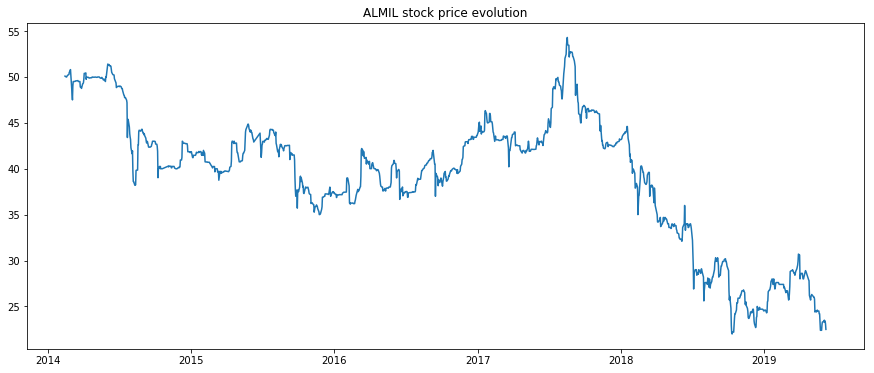

In [19]:
plt.plot(dataQd)
plt.title(symbols[0] + ' stock price evolution')

We will compute the rolling volatility over last 12 months, 6 months, 3 months and 1 month from the last available date.

    - The last available date is denoted by 'newest_date'

    - 1 month is 21 trading days.

In [28]:
#We will use the rolling method to to that

ts = dataQd["Last"] #We consider the closed price of the stock for each day

rolstd_12 = ts.rolling(252).std()
rolstd_6 = ts.rolling(126).std()
rolstd_3 = ts.rolling(63).std()
rolstd_1 = ts.rolling(21).std()

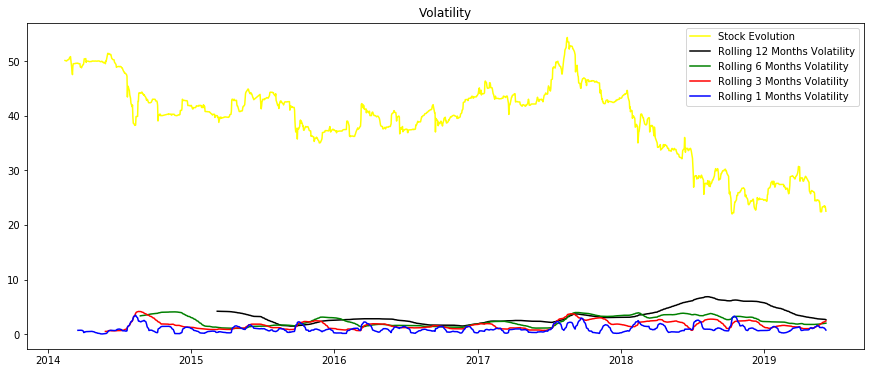

In [29]:
stock = plt.plot(ts, color='yellow', label = 'Stock Evolution')
std12 = plt.plot(rolstd_12, color='black', label = 'Rolling 12 Months Volatility')
std6 = plt.plot(rolstd_6, color='green', label = 'Rolling 6 Months Volatility')
std3 = plt.plot(rolstd_3, color='red', label = 'Rolling 3 Months Volatility')
std1 = plt.plot(rolstd_1, color='blue', label = 'Rolling 1 Months Volatility')
plt.legend(loc='best')
plt.title('Volatility')
plt.show(block=False)
